In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target
# Display the first few rows
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Data exploration
print(data.info())
print(data.describe())
print(data.tail())
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

C:\Users\ATHARVA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


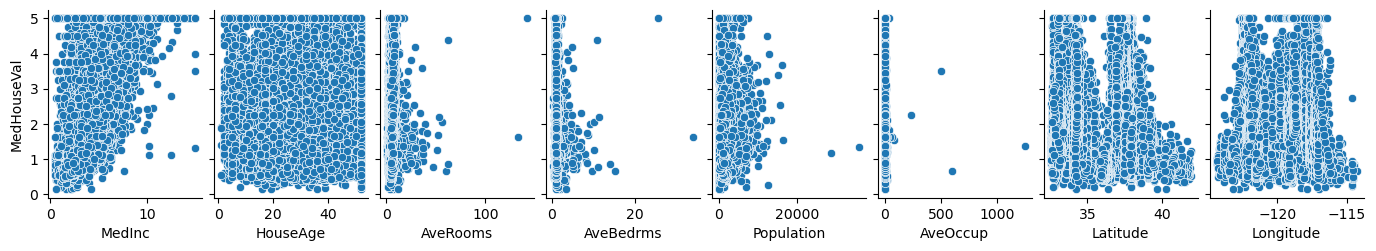

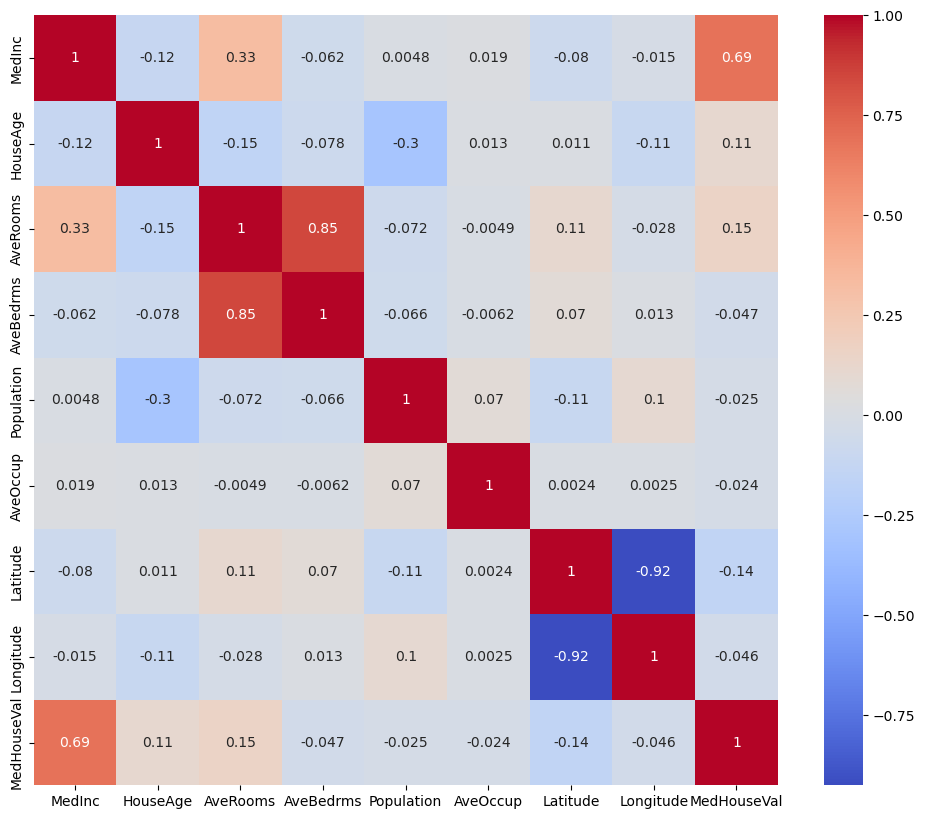

In [5]:
# Data visualization
sns.pairplot(data, x_vars=data.columns[:-1], y_vars='MedHouseVal', height=2.5, aspect=0.7)
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 640x480 with 0 Axes>

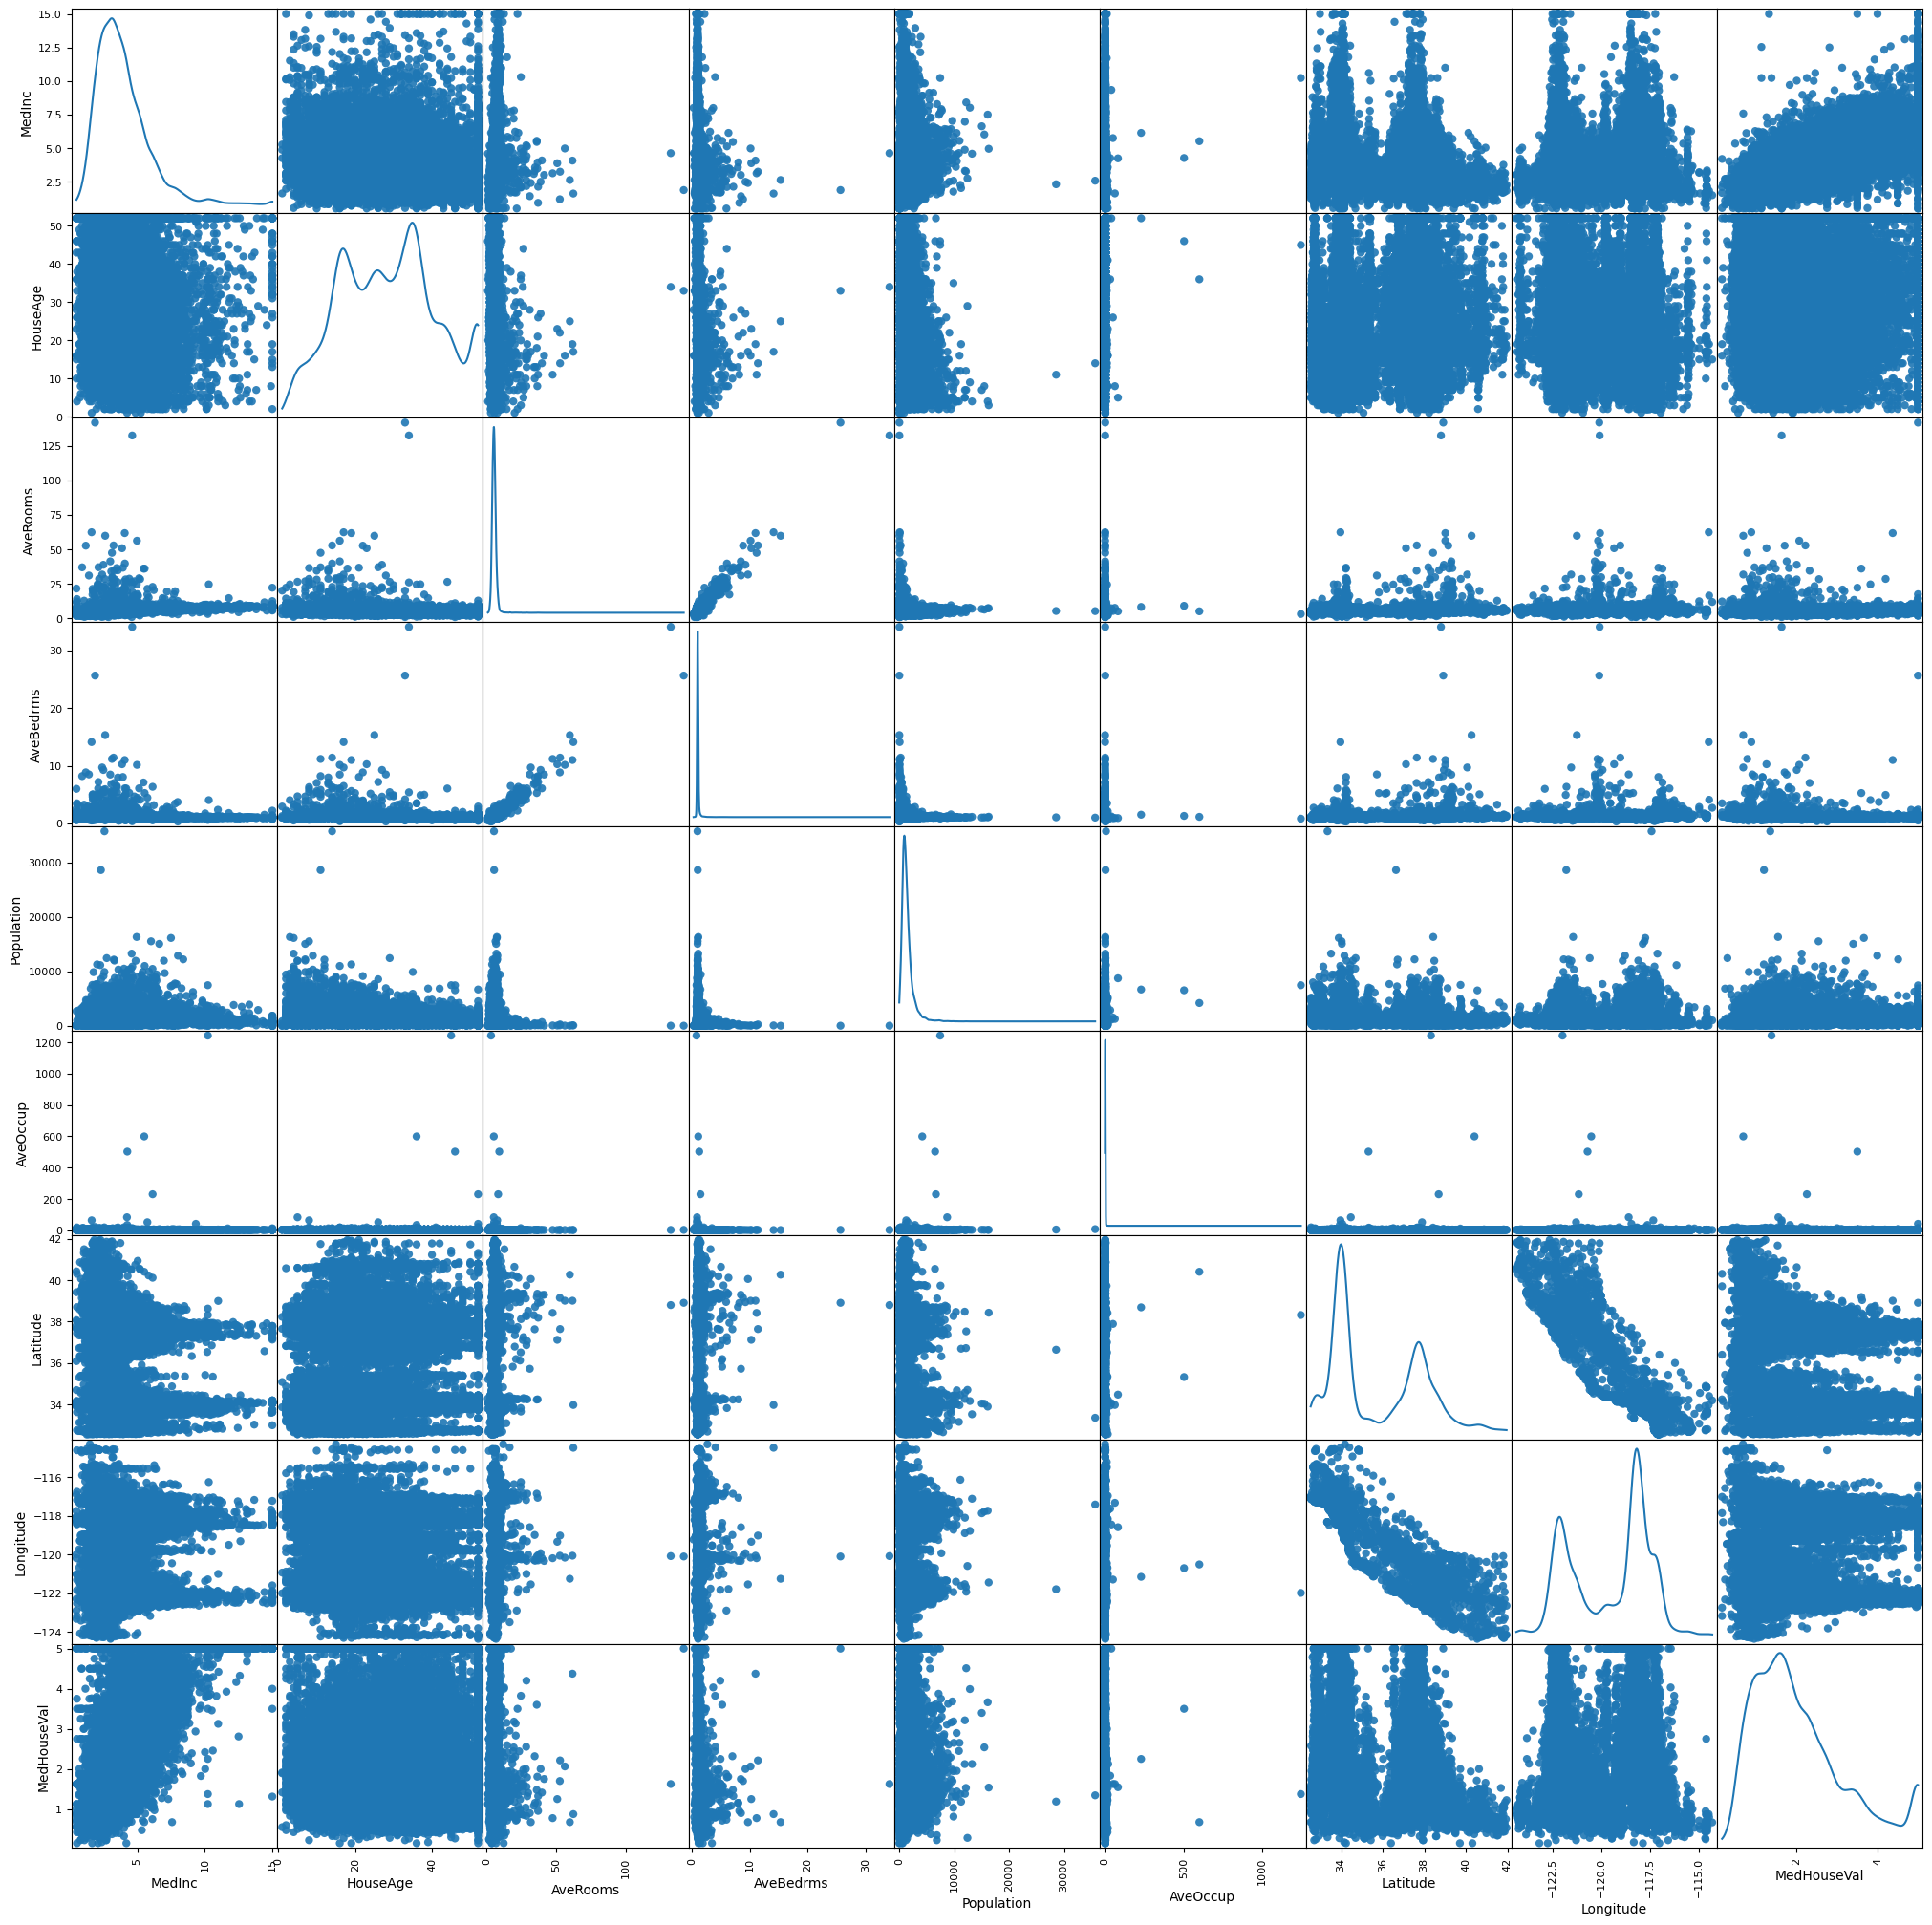

In [6]:
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(data,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

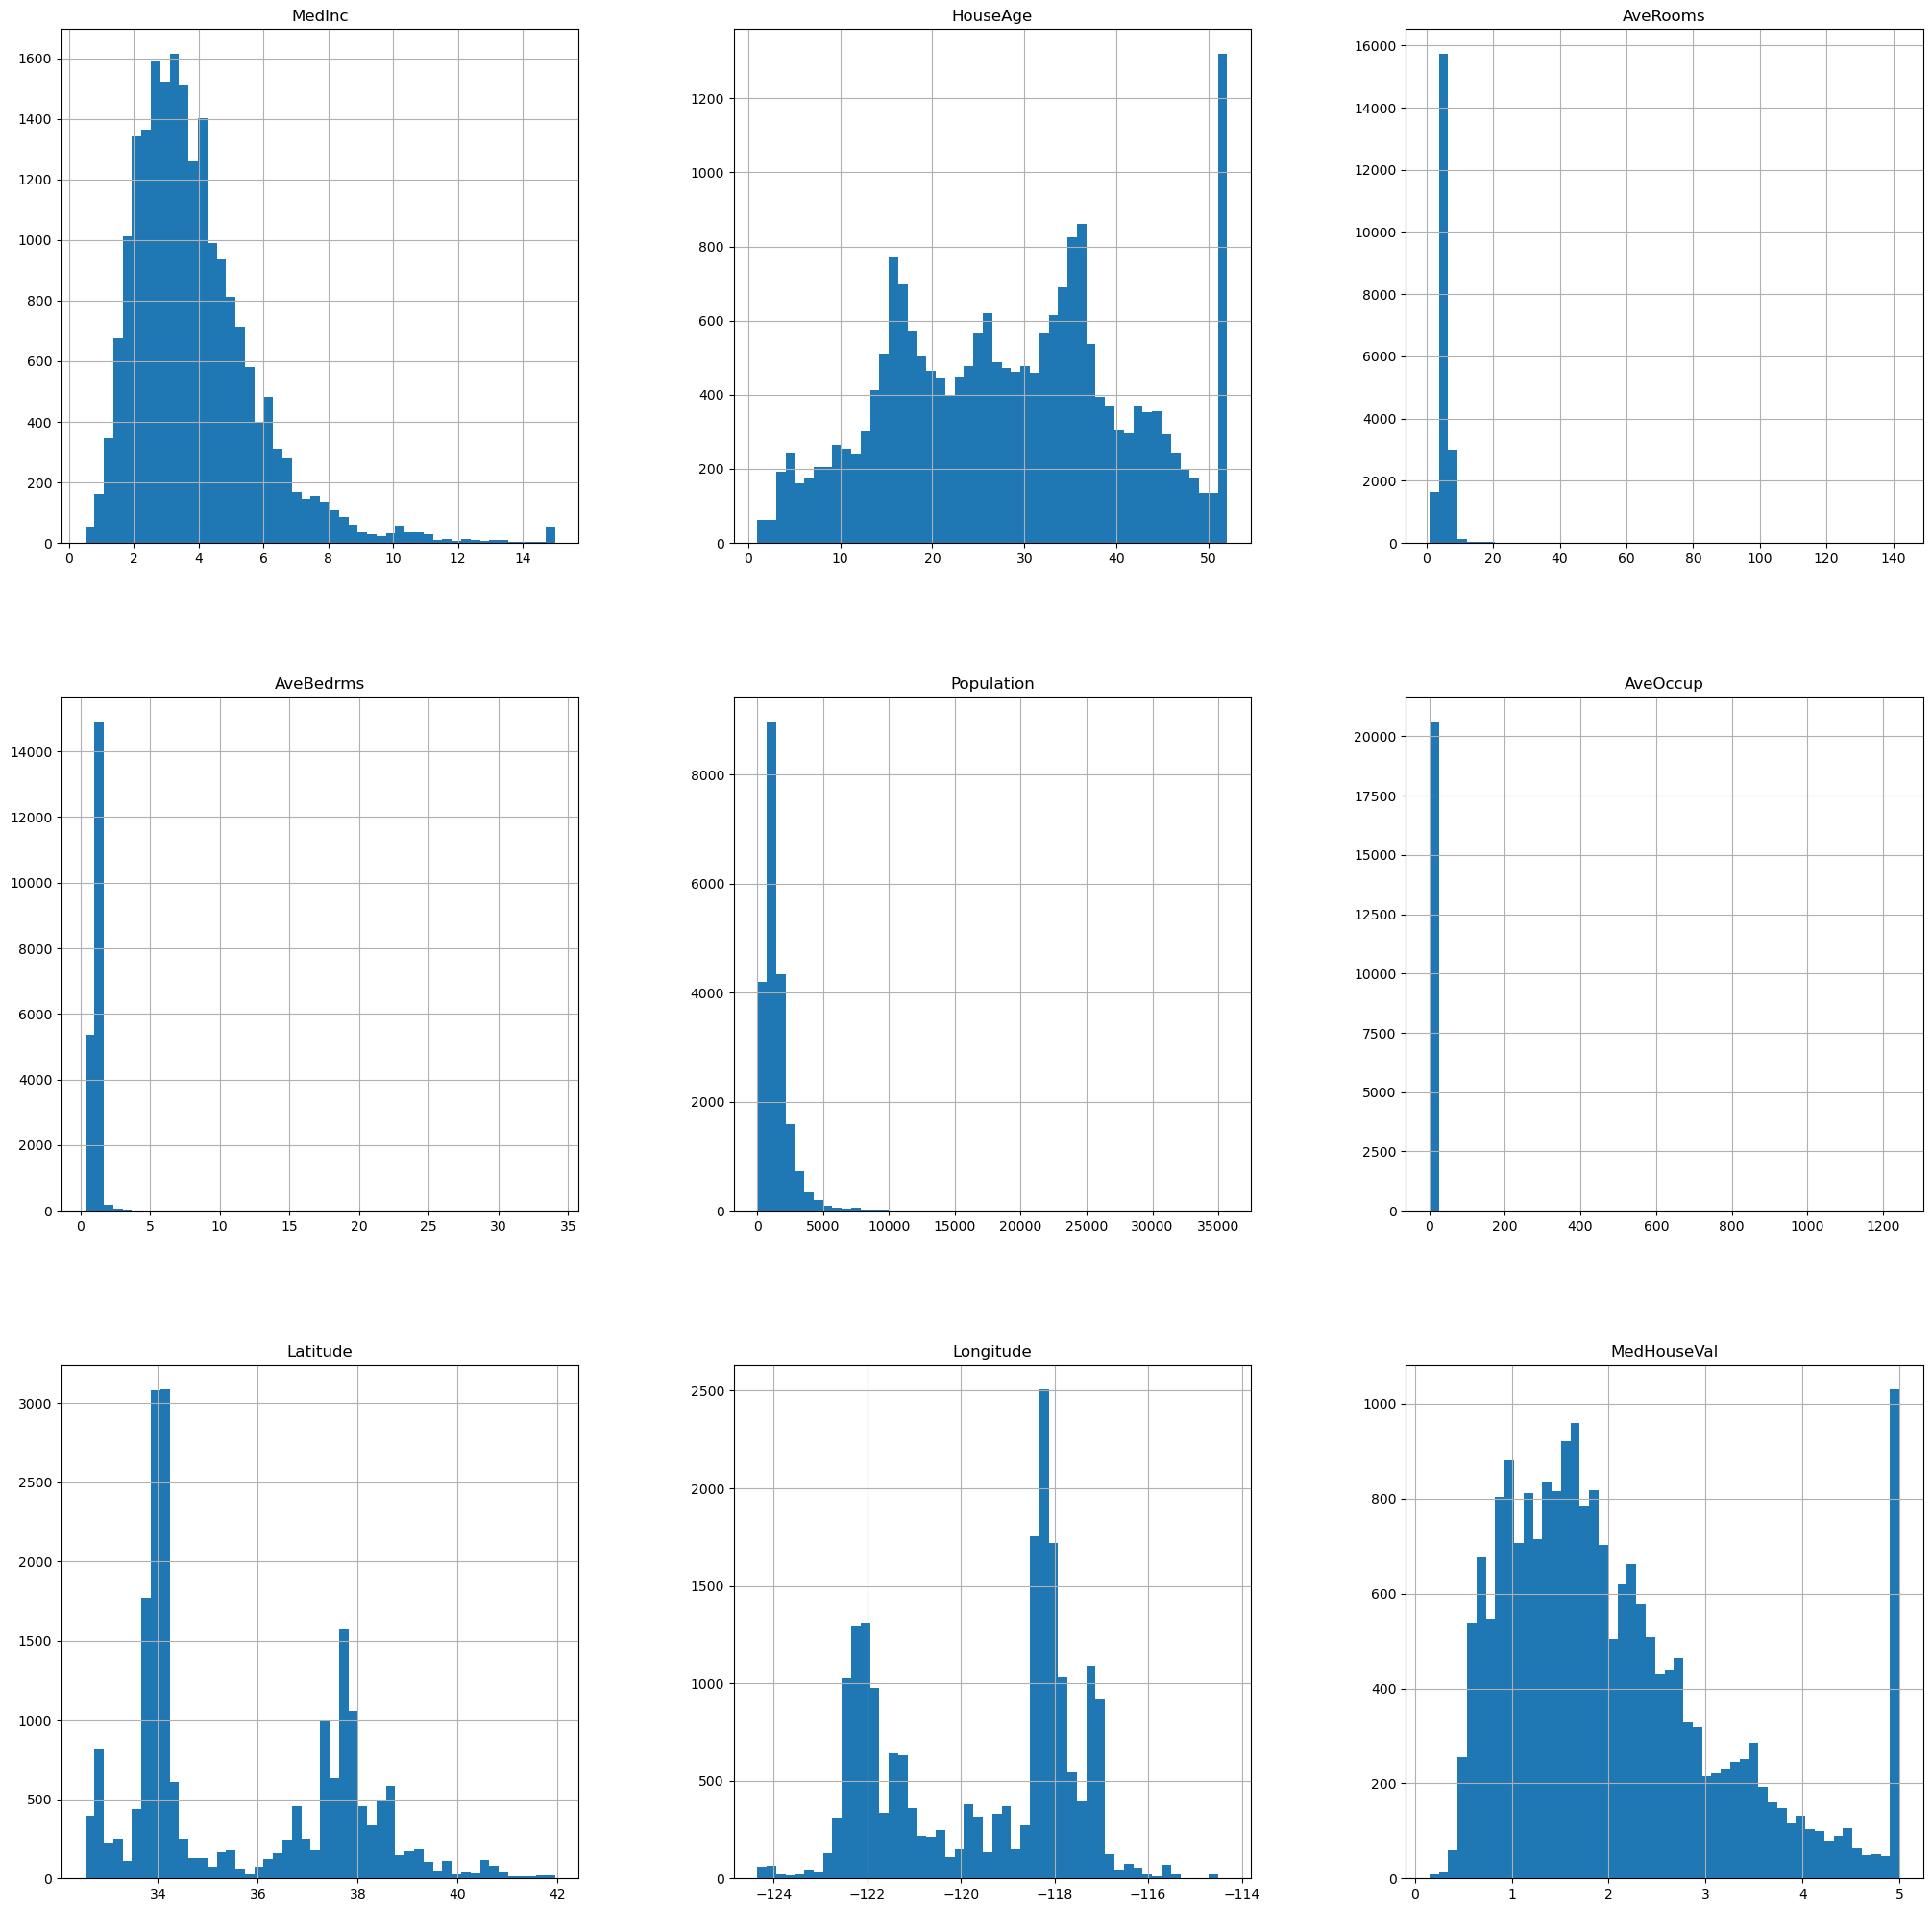

In [7]:
data.hist(figsize=(25,25),bins=50);

In [8]:
dcor = data.corr()
dcor.style.background_gradient()

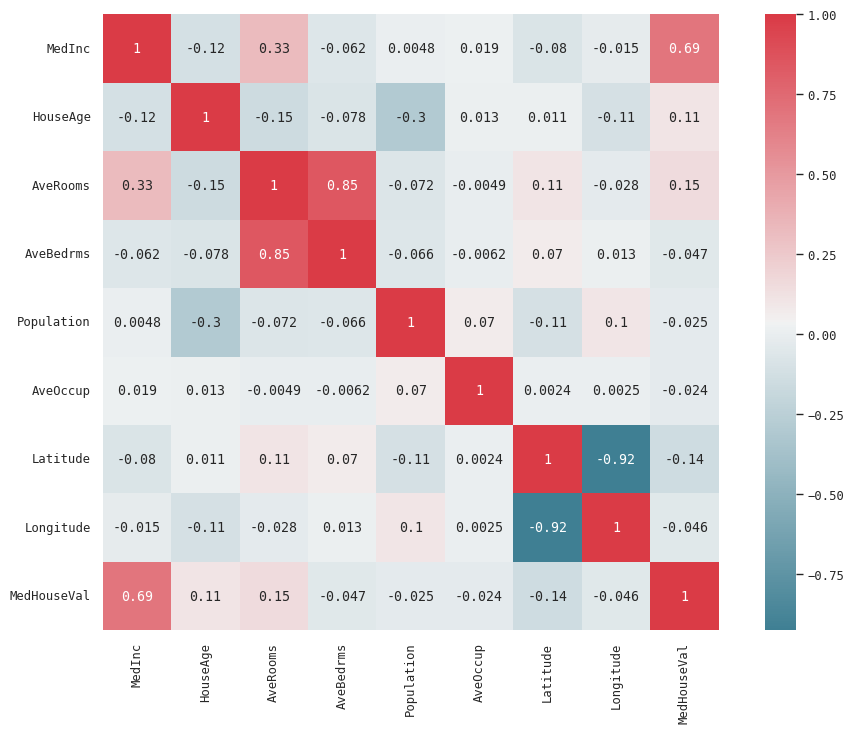

In [9]:
#heatmap using seaborn
#setting the context for plotting 
sns.set(context="paper",font="monospace")
data_cor_matrix = data.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(data_cor_matrix,vmax=1,square =True, cmap=cmap,annot=True );

In [18]:
#check wheather there are any missing values or null
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
print(data["AveBedrms"].value_counts())
data["AveBedrms"] = labelEncoder.fit_transform(data["AveBedrms"])
data["AveBedrms"].value_counts()
data.describe()

AveBedrms
1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: count, Length: 14233, dtype: int64


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000   6787.560029   1425.476744   
std        1.899822     12.585558      2.474173   3928.247795   1132.462122   
min        0.499900      1.000000      0.846154      0.000000      3.000000   
25%        2.563400     18.000000      4.440716   3421.750000    787.000000   
50%        3.534800     29.000000      5.229129   6637.000000   1166.000000   
75%        4.743250     37.000000      6.052381  10035.000000   1725.000000   
max       15.000100     52.000000    141.909091  14232.000000  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [22]:
#Split the dataset into 80% train and 20% test dataset
data_ind = data.drop("MedHouseVal",axis=1)
print(data_ind.head())
data_dep = data["MedHouseVal"]
print("MedHouseVal")
print(data_dep.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127       4683       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137       1747      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136       8436       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352       8416       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853       8951       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
MedHouseVal
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [23]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(data_ind,data_dep,test_size=0.2,random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 8) and size 132096
X_test shape (4128, 8) and size 33024
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [24]:
#Standardize the data
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-0.326196    0.34849025 -0.17491646 -0.85736386  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.20143479 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -1.14654237 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.35149223 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   1.17629604 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]
test data
[[-1.15508475 -0.28632369 -0.52068576 -0.57250905 -0.03030109  0.06740798
   0.1951      0.28534728]
 [-0.70865905  0.11043502 -0.16581537  1.48734733  0.12185077 -0.03602975
  -0.23549054  0.06097472]
 [-0.21040155  1.85617335 -0.61076476  1.46038785 -0.10241931 -0.14998876
   1.00947776 -1.42487026]
 [ 0.97511311 -0.92113763  0.3051148  -0.60938758  0.24497944  0.03001135
  -0.63799909  0.42994293]
 [-0.08179356  0.42784199  0.02419284 -0.45933013 -0.31965346 -0.05297076
   0.4

In [26]:
# Data preprocessing
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# LINEAR REGRESSION MODEL
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')

Linear Regression - MSE: 0.5308495699026408, R^2: 0.594897792431752


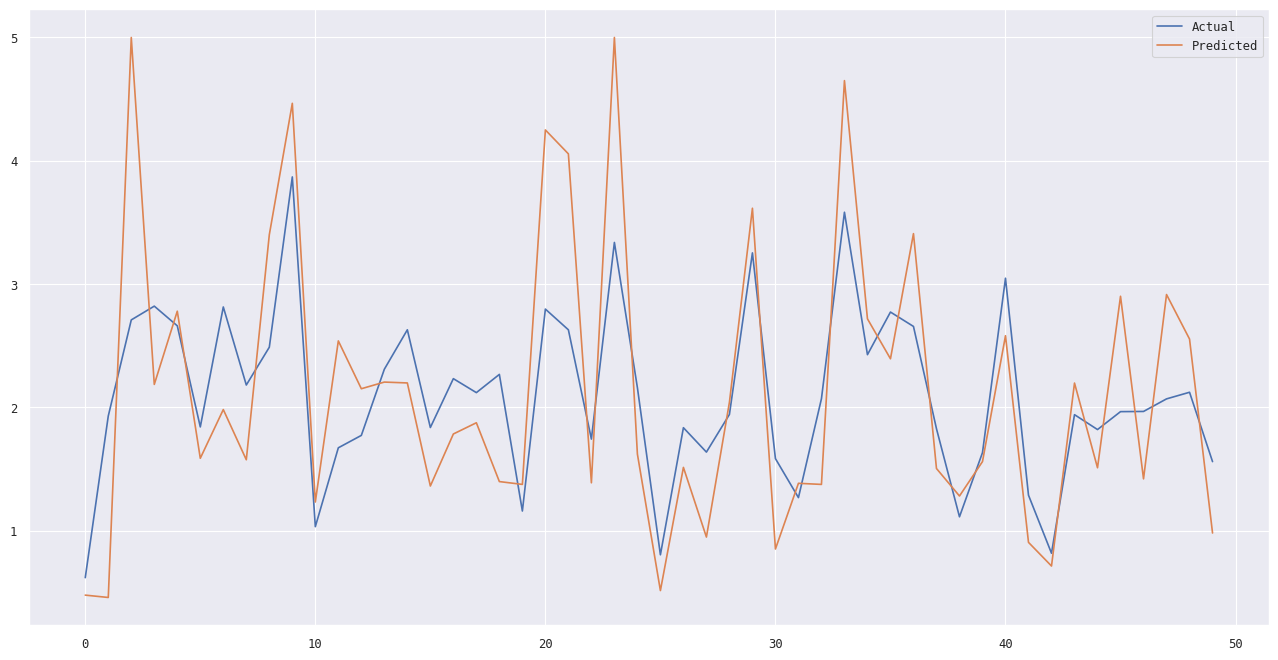

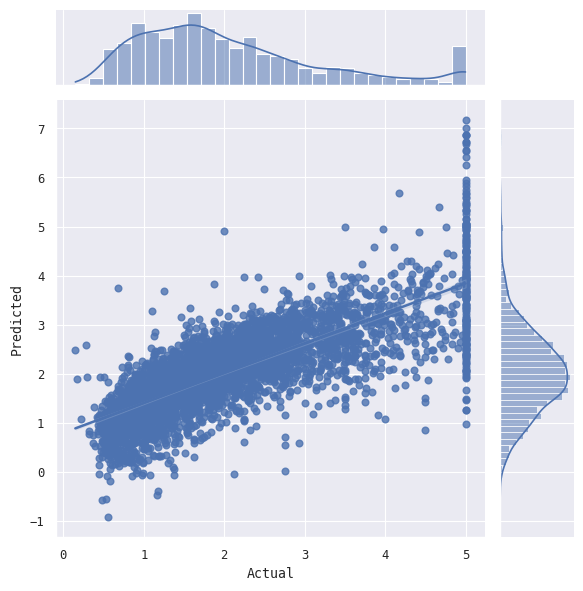

In [30]:
#testing
y_pred = model_lr.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [33]:
#Root Mean Squared Error
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,model_lr.predict(X_train))))

0.7285942422930892
0.7207049498062472


In [ ]:
#Perform Decision Tree Regression
#Perform Decision Tree Regression on training data. Predict output for test dataset using the fitted model.


In [35]:
from sklearn.tree import DecisionTreeRegressor
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [36]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([0.55839351, 0.77448744, 4.87159529, ..., 4.9654272 , 0.77448744,
       1.67481557])

In [37]:
print(len(dtReg_y_pred))
print(len(y_test))
print(dtReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[0.55839351 0.77448744 4.87159529 2.22975385 2.12635135]
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


In [38]:
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))


0.642528252628015


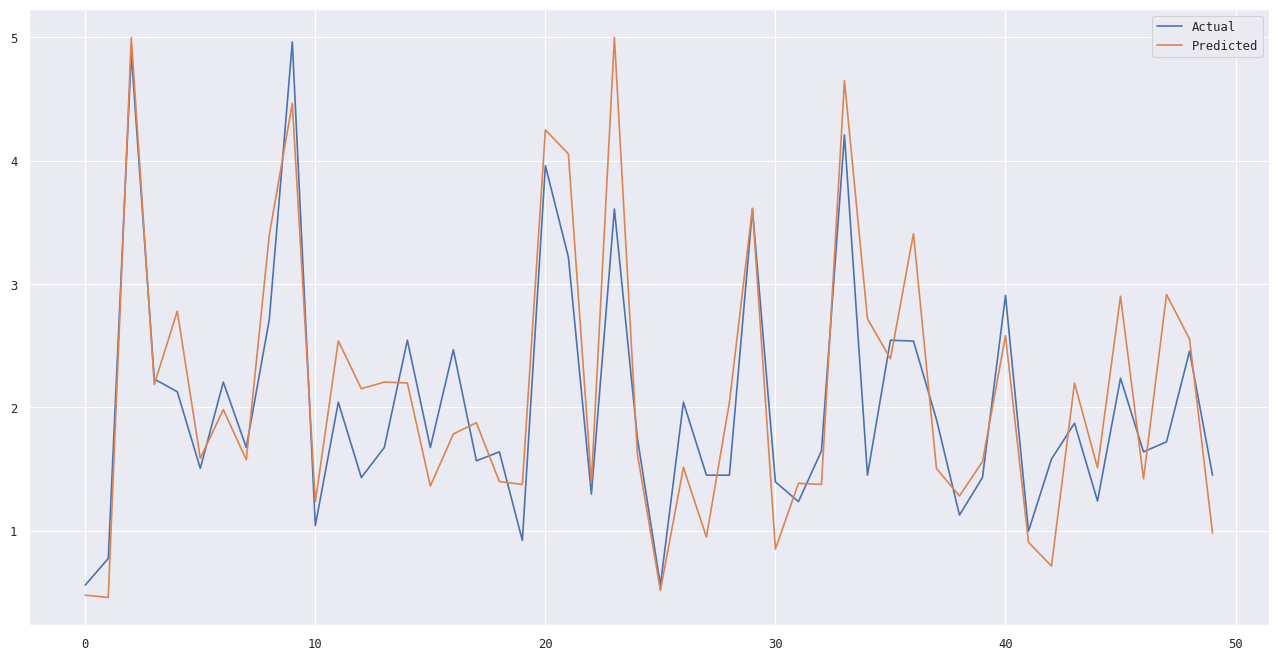

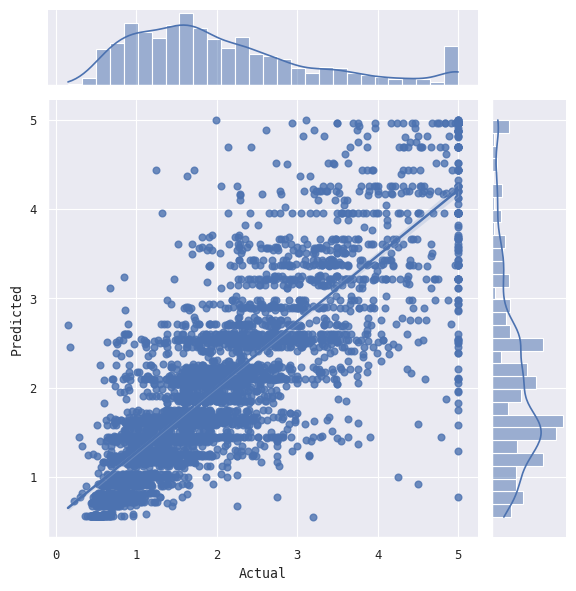

In [39]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [ ]:
#Perform Random Forest Regression
#Perform Random Forest Regression on training data.
#Predict output for test dataset using the fitted model. Print RMSE (root mean squared error) from Random Forest Regression.

In [40]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [41]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[0.513      0.72576667 4.83333967 2.64003333 2.38636667]
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64


In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))

0.5129354699259328


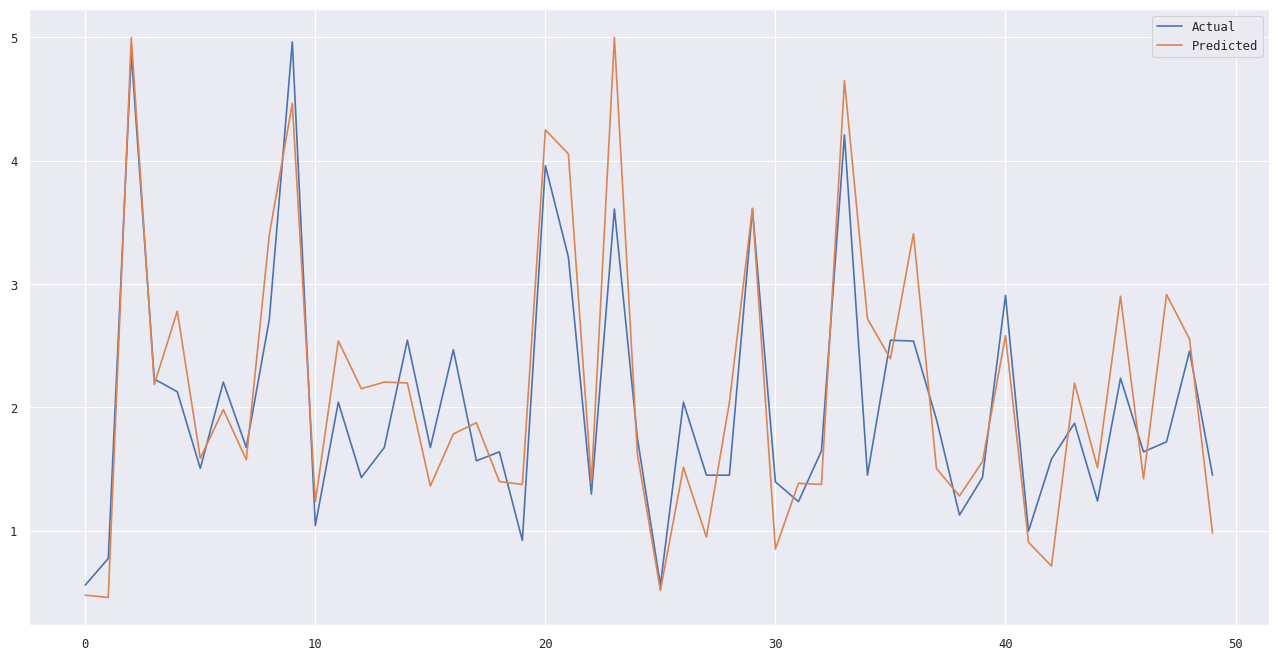

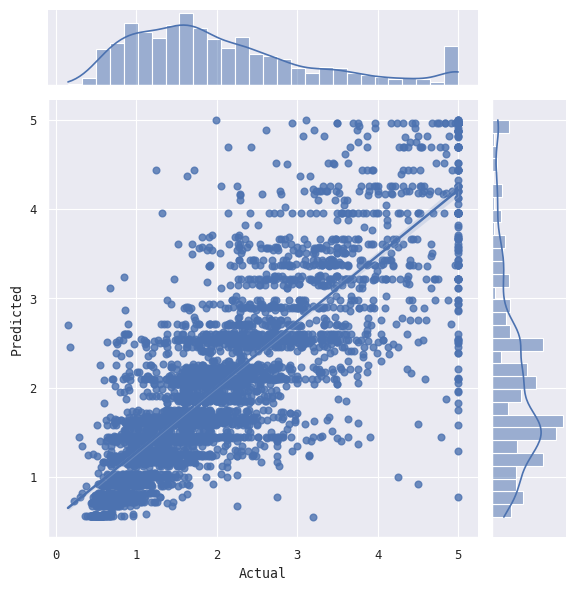

In [43]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [ ]:
#Gradient Boosting

In [44]:
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')

Gradient Boosting - MSE: 0.2940006053160144, R^2: 0.7756421009029697


In [ ]:
#MODEL COMPARISON


In [45]:
print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')
print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')

Linear Regression - MSE: 0.5308495699026408, R^2: 0.594897792431752
Gradient Boosting - MSE: 0.2940006053160144, R^2: 0.7756421009029697


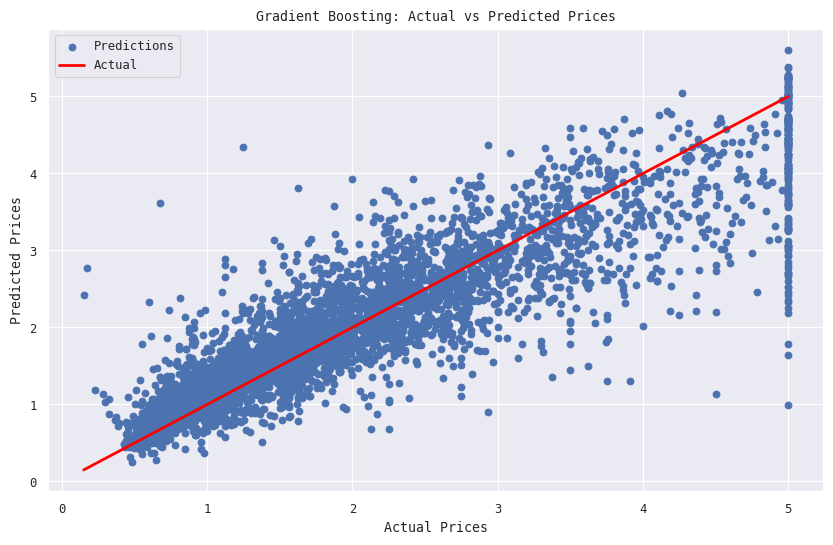

In [49]:
# Visualize predictions vs actual for the best model (Gradient Boosting)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.legend()
plt.show()